# Sistemas Inteligentes para Bioinformática

Exemplos de validação de código. Deverá corrigir os imports e diretórios de acordo com a sua implementação.

In [3]:
%load_ext autoreload
%autoreload 2
from src.si.data import Dataset, summary
# from src.si.util import summary
import os

In [5]:
DIR = os.path.dirname(os.path.realpath('.'))
filename = os.path.join(DIR, 'datasets/breast-bin.data')

## Labeled dataset

In [3]:
dataset = Dataset.from_data(filename, labeled=True)

In [4]:
# apenas as primeiras 5 linhas
dataset.X[:5, :]  # sendo um array de arrays, é possivel fazer o slice

array([[8., 4., 4., 1., 2., 9., 3., 3., 1.],
       [5., 1., 1., 3., 2., 1., 1., 1., 1.],
       [2., 1., 1., 1., 3., 1., 2., 1., 1.],
       [2., 1., 1., 1., 2., 1., 3., 1., 1.],
       [9., 5., 8., 1., 2., 3., 2., 1., 5.]])

In [5]:
# primeiras 5 labels
dataset.Y[:5]

array([1., 0., 0., 0., 1.])

In [6]:
print("Has label:", dataset.hasLabel())
print("Number of features:", dataset.getNumFeatures())
print("Number of classes:", dataset.getNumClasses())
summary(dataset)

Has label: True
Number of features: 9
Number of classes: 2


,A,B,C,D,E,F,G,H,I,Y
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,0.344778
var,7.917053,9.298082,8.819630,8.141527,4.896110,13.099601,5.937114,9.311340,2.937284,0.225906
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [7]:
dataset.toDataframe()

,A,B,C,D,E,F,G,H,I,Y
0,8.0,4.0,4.0,1.0,2.0,9.0,3.0,3.0,1.0,1.0
1,5.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
2,2.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,0.0
3,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
4,9.0,5.0,8.0,1.0,2.0,3.0,2.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...
694,1.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,1.0,0.0
695,5.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0
696,5.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
697,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,0.0


## Standard Scaler

In [8]:
from src.si.util import StandardScaler
sc = StandardScaler()
ds2 = sc.fit_transform(dataset)
summary(ds2)

,A,B,C,D,E,F,G,H,I,Y
mean,-3.811925e-17,-1.219816e-16,-6.607336e-17,9.148619e-17,6.607336e-17,-5.082566e-17,5.082566e-18,-8.386234e-17,-5.717887e-17,0.344778
var,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.225906
min,-1.214667e+00,-6.999951e-01,-7.432990e-01,-6.332472e-01,-1.001495e+00,-6.869792e-01,-1.000471e+00,-6.118250e-01,-3.439118e-01,0.000000
max,1.983939e+00,2.251526e+00,2.287222e+00,2.520955e+00,3.065906e+00,1.799664e+00,2.693171e+00,2.337594e+00,4.907421e+00,1.000000


# Feature Selection

In [9]:
import importlib
from src.si.data.feature_selection import f_regress, SelectKBest, VarianceThreshold

## Variance Threshold

In [10]:
vt = VarianceThreshold(8)
ds2 = vt.fit_transform(dataset)
summary(ds2)

,B,C,D,F,H,Y
mean,3.134478,3.207439,2.806867,3.486409,2.866953,0.344778
var,9.298082,8.819630,8.141527,13.099601,9.311340,0.225906
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


## SelectKBest

In [11]:
# SelectKBest for classification
skb = SelectKBest(5)
ds3 = skb.fit_transform(dataset)
summary(ds3)

,A,B,C,F,G,y
mean,4.417740,3.134478,3.207439,3.486409,3.437768,0.344778
var,7.917053,9.298082,8.819630,13.099601,5.937114,0.225906
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


# Clustering

In [7]:
from src.si.unsupervised import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# o dataset iris nao estava inicialmente no github
filename = os.path.join(DIR, 'datasets/iris.data')
df = pd.read_csv(filename)
iris = Dataset.from_dataframe(df,ylabel="class")

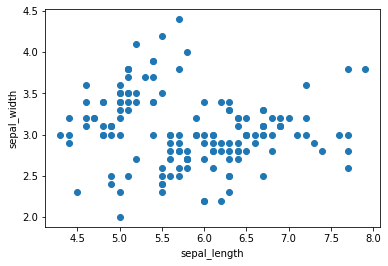

In [9]:
# indice das features para o plot
c1 = 0
c2 = 1
# plot
plt.scatter(iris.X[:,c1], iris.X[:,c2])
plt.xlabel(iris._xnames[c1])
plt.ylabel(iris._xnames[c2])
plt.show()

In [31]:
kmeans = KMeans(3)
cent, clust = kmeans.fit_transform(iris)

ValueError: operands could not be broadcast together with shapes (150,4) (3,4) 

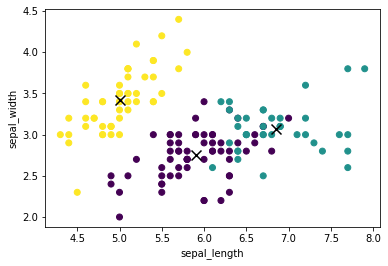

In [16]:

plt.scatter(iris.X[:,c1], iris.X[:,c2],c=clust)
plt.scatter(cent[:,c1],cent[:,c2], s = 100, c = 'black',marker='x')
plt.xlabel(iris._xnames[c1])
plt.ylabel(iris._xnames[c2])
plt.show()
# podem obter clusterings diferentes já que estes dependem da escolha dos centroids iniciais

# PCA

In [28]:
from src.si.unsupervised import PCA
pca = PCA(2, using='svd')

In [29]:
reduced = pca.fit_transform(iris)
iris_reduced = reduced[0]
# print(iris_reduced)
print(pca.variance_explained())

[[-1.08374515e-01 -4.30198387e-02]
 [-9.98503796e-02  5.57547718e-02]
 [-1.13323362e-01  2.70926177e-02]
 [-1.10272311e-01  4.89460849e-02]
 [-1.14320085e-01 -5.74019389e-02]
 [-9.90899920e-02 -1.29181748e-01]
 [-1.17044776e-01 -6.34298891e-03]
 [-1.06905306e-01 -2.10643251e-02]
 [-1.12079421e-01  9.31632514e-02]
 [-1.04743785e-01  3.81645251e-02]
 [-1.03538302e-01 -9.10747351e-02]
 [-1.11381668e-01 -1.34909117e-02]
 [-1.06438262e-01  6.03241315e-02]
 [-1.26329299e-01  7.98189203e-02]
 [-1.04916825e-01 -1.60779006e-01]
 [-1.07748710e-01 -2.31589995e-01]
 [-1.05417362e-01 -1.28773562e-01]
 [-1.04815734e-01 -4.37514685e-02]
 [-9.06449989e-02 -1.21743478e-01]
 [-1.11983295e-01 -9.85130054e-02]
 [-9.16252139e-02 -3.66193375e-02]
 [-1.05508047e-01 -8.10248050e-02]
 [-1.32763862e-01 -4.16428337e-02]
 [-8.71197105e-02 -9.08120713e-03]
 [-1.06636141e-01 -1.37970510e-02]
 [-9.36575929e-02  5.17129491e-02]
 [-9.82059032e-02 -2.26296311e-02]
 [-1.03763570e-01 -4.69596150e-02]
 [-1.02428945e-01 -2

In [30]:
iris_pca = Dataset(iris_reduced,iris.Y,xnames=['pc1','pc2'],yname='class')
iris_pca.toDataframe()

,pc1,pc2,class
0,-0.108375,-0.04302,Iris-setosa
1,-0.09985,0.055755,Iris-setosa
2,-0.113323,0.027093,Iris-setosa
3,-0.110272,0.048946,Iris-setosa
4,-0.11432,-0.057402,Iris-setosa
...,...,...,...
145,0.089518,-0.032566,Iris-virginica
146,0.074585,0.077014,Iris-virginica
147,0.072783,-0.022696,Iris-virginica
148,0.06587,-0.086461,Iris-virginica


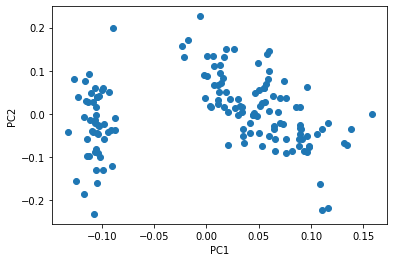

In [31]:
plt.scatter(iris_pca.X[:,0], iris_pca.X[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


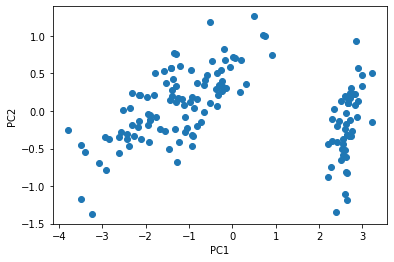

In [20]:
plt.scatter(iris_pca.X[:,0], iris_pca.X[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()